In [ ]:
library(rpart)
library(caret)
library(dplyr)
library(rpart.plot)
library(caTools)

In [ ]:
getwd()

In [19]:
list.files()

[1] "9781788295864_Code"         "AirlineDelay"              
 [3] "Airline_Data.R"             "DOT_ONTIME.csv"            
 [5] "Data Science with |R.ipynb" "FuelConsumption"           
 [7] "Introduction.ipynb"         "Lab_1.ipynb"               
 [9] "R programming Lab_1.ipynb"  "Twitter Data.R"            
[11] "Uber"                       "Uber_Lab.ipynb"            
[13] "a.R"                        "b.R"                       
[15] "c.R"                        "d.R"                       
[17] "imgs"                       "longintro.pdf"             
[19] "r-data-science"             "r-programming-fundamentals"
[21] "test.r"                     "titanic.csv"               
[23] "tweets.csv"

In [5]:
titanic<- read.csv("titanic.csv", header=T, sep=",")

In [6]:
head(titanic)

Survived,Pclass,Name,Sex,Age,Siblings.Spouses.Aboard,Parents.Children.Aboard,Fare
0,3,Mr. Owen Harris Braund,male,22,1,0,7.2500
1,1,Mrs. John Bradley (Florence Briggs Thayer) Cumings,female,38,1,0,71.2833
1,3,Miss. Laina Heikkinen,female,26,0,0,7.9250
1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35,1,0,53.1000
0,3,Mr. William Henry Allen,male,35,0,0,8.0500
0,3,Mr. James Moran,male,27,0,0,8.4583


In [7]:
names(titanic)

[1] "Survived"                "Pclass"                 
[3] "Name"                    "Sex"                    
[5] "Age"                     "Siblings.Spouses.Aboard"
[7] "Parents.Children.Aboard" "Fare"

In [6]:
install.packages("dplyr")
library(dplyr)
mutate(titanic, f=Fare*1.1)

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


ERROR: Error in mutate(titanic, f = Fare * 1.1): object 'titanic' not found


In [ ]:
head(titanic)

In [37]:
df<- select(titanic, Survived, Pclass,Sex, Age)

In [1]:
df<- mutate(df, survived=factor(Survived), class=as.numeric(Pclass), age=as.numeric(Age))

ERROR: Error in mutate(df, survived = factor(Survived), class = as.numeric(Pclass), : could not find function "mutate"


In [27]:
library(MASS)
data(package="MASS")
boston<-Boston
dim(boston)
names(boston)

[1] 506  14

[1] "crim"    "zn"      "indus"   "chas"    "nox"     "rm"      "age"    
 [8] "dis"     "rad"     "tax"     "ptratio" "black"   "lstat"   "medv"

In [28]:
require(randomForest)

Loading required package: randomForest
randomForest 4.6-14
Type rfNews() to see new features/changes/bug fixes.


In [29]:
set.seed(101)
train = sample(1:nrow(boston), 300)

In [30]:
rf.boston = randomForest(medv~., data = boston, subset = train)
rf.boston


Call:
 randomForest(formula = medv ~ ., data = boston, subset = train) 
               Type of random forest: regression
                     Number of trees: 500
No. of variables tried at each split: 4

          Mean of squared residuals: 12.30718
                    % Var explained: 85.13

In [31]:
oob.err = double(13)
test.err = double(13)
for(mtry in 1:13){
  fit = randomForest(medv~., data = boston, subset=train, mtry=mtry, ntree = 350)
  oob.err[mtry] = fit$mse[350]
  pred = predict(fit, boston[-train,])
  test.err[mtry] = with(boston[-train,], mean( (medv-pred)^2 ))
}

###  What Is A Decision Tree Algorithm
![Tux, the Linux mascot](imgs/decision_tree_Agorithm.png)


###  Entropy measures the impurity or uncertainty present in the data. It is used to decide how a Decision Tree can split the data.
![Tux, the Linux mascot](imgs/Entropy.png)


![Tux, the Linux mascot](imgs/Information_Gain.png)


In [25]:
dt<-as.Date('April 26, 2001',format='%B %d, %Y')
dt

[1] "2001-04-26"

In [53]:
dt<-as.Date('01-May-19',format='%d-%b-%y')
dt

[1] "2019-05-01"

In [56]:
month2 <- c("Jan","Dec","Jan","Mar","Apr")
year2 <- c(1998,1998,1999,1999,1999)
day2 <- c(4,10,3,16,25)
date.df6 <- paste(year2,month2,day2,sep="-")
date.df6

[1] "1998-Jan-4"  "1998-Dec-10" "1999-Jan-3"  "1999-Mar-16" "1999-Apr-25"

In [15]:
df<- read.csv("df.csv", header=T)

In [16]:
tail(df)

,ID,IP_Address,Secceed_Count,Failed_Count,Consecutive_Failed_Count,Max_Consecutive_Failed_Count,Max_Consecutive_Failed_Time,Failed_Percentage,Last_Ping_Status,Last_Ping_Time,Last_Ping_TTL,Average_Ping_Time,Description,Last_Secceed_on,Last_Failed_on,Minimum_Ping_Time,Maximum_Ping_Time,Order,date
65529,178767,10.129.84.66,9270,1067,8,1017,5/6/2019 7:07:27 AM,10.32%,Succeeded,1,248,1,?????? ?????????? ??????,5/7/2019 11:51:51 PM,5/7/2019 2:57:59 PM,NA,1,24,08-May-19
65530,175784,10.129.84.65,9111,1049,7,1031,5/6/2019 7:07:27 AM,10.32%,Succeeded,2,248,1,?????? ?????????? ??????,5/7/2019 8:51:55 PM,5/7/2019 2:56:58 PM,NA,1,24,07-May-19
65531,149752,10.19.10.3,7736,890,1,8,5/6/2019 6:06:27 AM,10.32%,Succeeded,1,248,17,?????? ?????? ???????? ??????,5/6/2019 6:52:07 PM,5/6/2019 6:51:06 PM,NA,1,69,06-May-19
65532,125962,10.27.25.35,6466,744,1,701,5/5/2019 6:06:17 AM,10.32%,Succeeded,1,57,2,???? ????? ??????? ? ???????,5/5/2019 6:52:06 PM,5/5/2019 1:02:14 PM,NA,1,70,05-May-19
65533,123982,10.27.15.7,6360,732,1,699,5/5/2019 6:04:15 AM,10.32%,Succeeded,1,248,2,????? ??????? ?? ???? ?? ????? ???????? ???????? ??????,5/5/2019 4:51:59 PM,5/5/2019 12:33:46 PM,NA,1,70,05-May-19
65534,278471,10.34.10.3,14589,1677,1,8,5/4/2019 8:30:17 AM,10.31%,Succeeded,1,248,1,????? ???????? ??????,5/12/2019 4:22:07 AM,5/9/2019 11:53:18 AM,NA,0,10,12-May-19


In [17]:
head(df$date)

[1] 30-Apr-19 06-May-19 06-May-19 06-May-19 06-May-19 06-May-19
13 Levels: 01-May-19 02-May-19 03-May-19 04-May-19 05-May-19 ... 30-Apr-19

In [18]:
typeof(df$date)

[1] "integer"

In [19]:
df$date[1]

[1] 30-Apr-19
13 Levels: 01-May-19 02-May-19 03-May-19 04-May-19 05-May-19 ... 30-Apr-19

In [20]:
as.Date(df$date[1], format="%d-%b-%y")

[1] "2019-04-30"

In [35]:
quiz_scores$scores[quiz_scores$gender=="f"]#to see grades for female students

[1] 25 16 15 23 24 17

In [22]:
library(dplyr)
df<- mutate(df, dd=as.Date(df$date, format="%d-%b-%y"))


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



In [23]:
head(df$dd)

[1] "2019-04-30" "2019-05-06" "2019-05-06" "2019-05-06" "2019-05-06"
[6] "2019-05-06"

In [ ]:
df<-mutate(df, newDate=as.Date(df$data, format="$d-%b-%y"))

ERROR: Error in as.Date.default(df$data, format = "$d-%b-%y"): do not know how to convert 'df$data' to class “Date”


In [54]:
as.Date("22-Jan-19", format="%d-%b-%y")

[1] "2019-01-22"

# Assessment

In [54]:
df2<- data.frame(c("A", "A", "B", "B", "C"),
pop=c(219, 226, 370, 238, 315),
coast=c(0, 1, 0 , 0, 0),
stringsAsFactor=F)
# select  summary, head, print, describe
summary(df2)

 c..A....A....B....B....C..      pop            coast     stringsAsFactor
 A:2                        Min.   :219.0   Min.   :0.0   Mode :logical  
 B:2                        1st Qu.:226.0   1st Qu.:0.0   FALSE:5        
 C:1                        Median :238.0   Median :0.0                  
                            Mean   :273.6   Mean   :0.2                  
                            3rd Qu.:315.0   3rd Qu.:0.0                  
                            Max.   :370.0   Max.   :1.0                  

In [56]:
library(stringr)
x<- c("Friday", "Sunday", "March", "February")
str_detect(x, "day")


[1]  TRUE  TRUE FALSE FALSE

In [57]:
# which class return Logical
x<- FALSE
class(x)
x<- "5.35"
class(x)
x<- -10L
class(x)

[1] "logical"

[1] "character"

[1] "integer"

In [ ]:
install.packages("lubridate")
library(lubridate)
session_df<- daat.frame(

id=1:2,
logout_t=c("July 22, 2010 20:55", "Juky 22, 2010 17:27"),
    stringAsFactors=FALSE
)

session_df$logout_t<- ymd_hms(
sessions_df$logout_t
)
str(sesions_df)

In [15]:
mtcars2 <- subset(mtcars, cyl == 4)
with(mtcars2, sum(vs))
sum(mtcars2$am)
rm(mtcars2) 


[1] 10

[1] 8

cyl,mean
4,26.66364
6,19.74286
8,15.10000


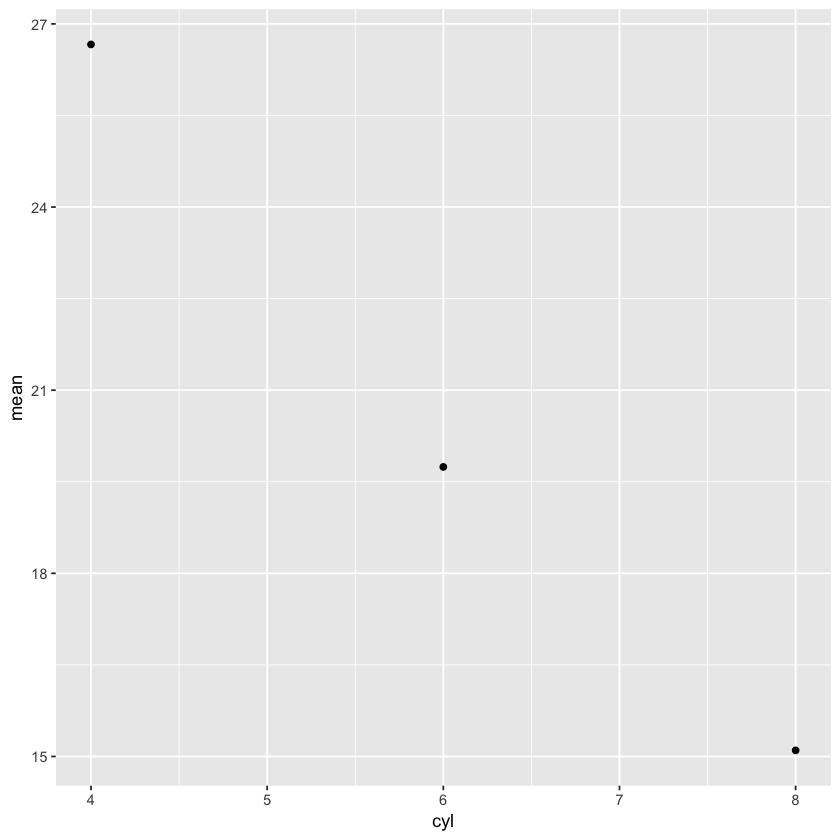

In [287]:
library(dplyr)
library(ggplot2)

(by_cyl <- mtcars %>%
  group_by(cyl) %>%
  summarise(mean = mean(mpg)))

ggplot(by_cyl, aes(cyl, mean)) + geom_point()

In [18]:
install.packages("car")
library(car)

also installing the dependencies ‘zip’, ‘SparseM’, ‘MatrixModels’, ‘foreign’, ‘openxlsx’, ‘nloptr’, ‘carData’, ‘abind’, ‘pbkrtest’, ‘quantreg’, ‘maptools’, ‘rio’, ‘lme4’

Warning message in install.packages("car"):
“installation of package ‘zip’ had non-zero exit status”Warning message in install.packages("car"):
“installation of package ‘nloptr’ had non-zero exit status”Warning message in install.packages("car"):
“installation of package ‘openxlsx’ had non-zero exit status”Warning message in install.packages("car"):
“installation of package ‘lme4’ had non-zero exit status”Warning message in install.packages("car"):
“installation of package ‘pbkrtest’ had non-zero exit status”Warning message in install.packages("car"):
“installation of package ‘rio’ had non-zero exit status”Warning message in install.packages("car"):
“installation of package ‘car’ had non-zero exit status”Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


ERROR: Error in library(car): there is no package called ‘car’


In [ ]:
dim(UN)

# Clear up

In [25]:

# clean package
detach("package:datasets", unload=TRUE)

ERROR: Error in detach("package:datasets", unload = TRUE): invalid 'name' argument


In [26]:
# clear plots
dev.off()

null device 
          1

In [108]:
df <- read.csv("https://stats.idre.ucla.edu/stat/data/binary.csv")
                                                                                                df <- read.csv(“https://stats.idre.ucla.edu/stat/data/binary.csv")
 str(df)

ERROR: Error in parse(text = x, srcfile = src): <text>:2:112: unexpected input
1: df <- read.csv("https://stats.idre.ucla.edu/stat/data/binary.csv")
2:                                                                                                 df <- read.csv(<e2>
                                                                                                                  ^


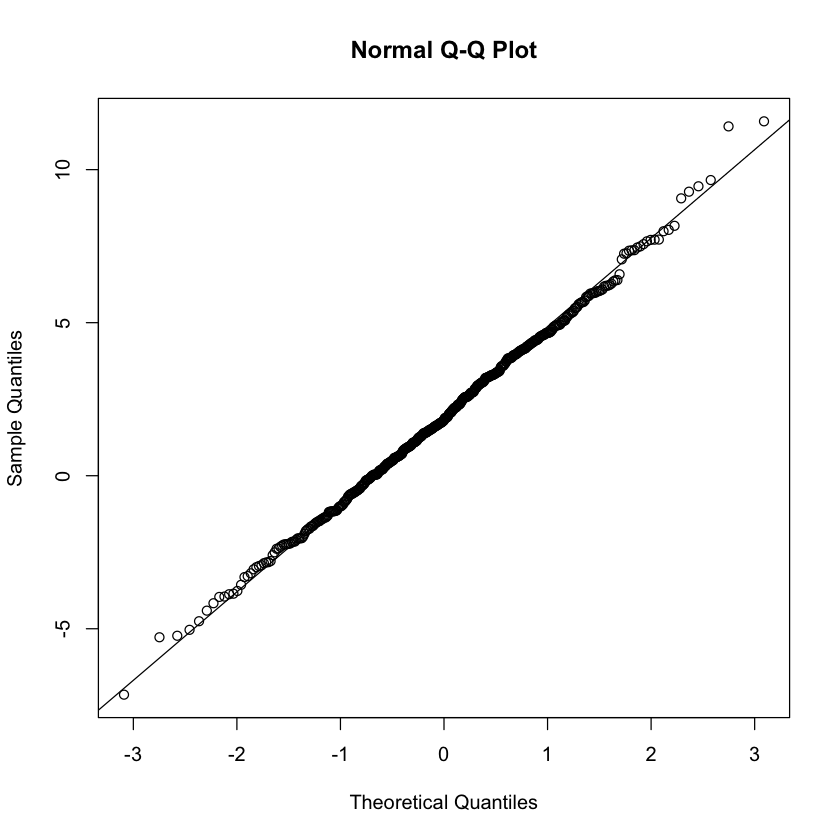

In [111]:
    x=rnorm(500,2,3)
qqnorm(x)
qqline(x) #to add normality line

 num [1:100] 4.12 5.85 5.92 2.37 2.28 ...


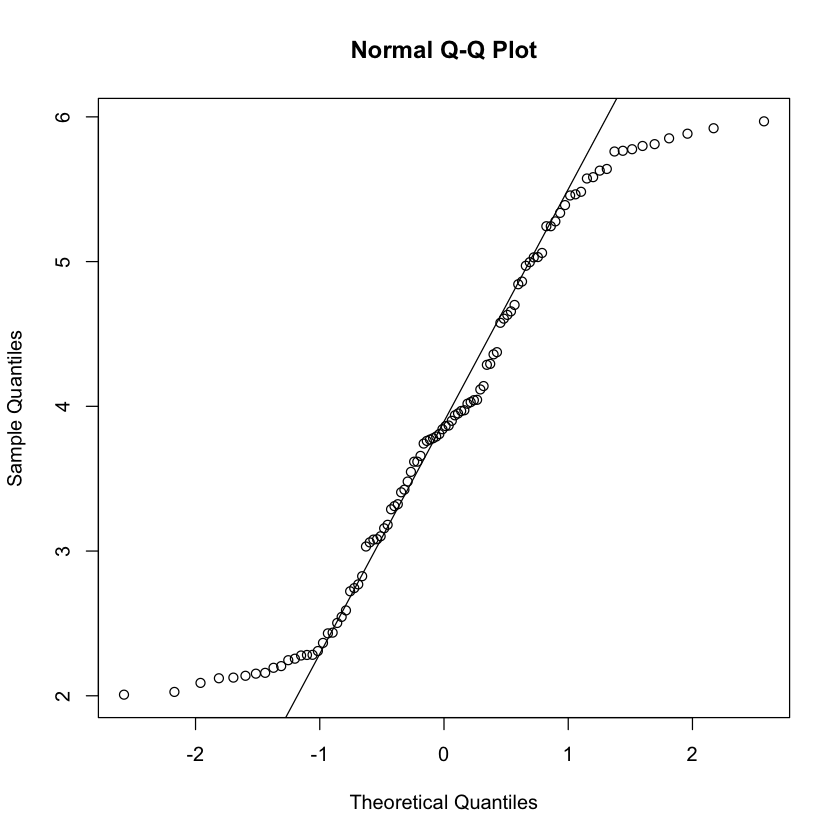

In [68]:
 y=runif(100,2,6)
qqnorm(y) #draw a qq plot
qqline(y)
str(y)

# K-means   1

![](imgs/kmeans_SS.png)

In [ ]:
library(tidyverse)  # data manipulation
library(cluster)    # clustering algorithms
library(factoextra)

In [ ]:
df <- USArrests
head(df)

In [124]:
names(iris)

[1] "Sepal.Length" "Sepal.Width"  "Petal.Length" "Petal.Width"  "Species"

In [127]:
head(iris)

Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
5.1,3.5,1.4,0.2,setosa
4.9,3.0,1.4,0.2,setosa
4.7,3.2,1.3,0.2,setosa
4.6,3.1,1.5,0.2,setosa
5.0,3.6,1.4,0.2,setosa
5.4,3.9,1.7,0.4,setosa


In [55]:
set.seed(20)
irisCluster <- kmeans(iris[, 1:4], 3)

In [56]:
str(irisCluster)

List of 9
 $ cluster     : int [1:150] 3 3 3 3 3 3 3 3 3 3 ...
 $ centers     : num [1:3, 1:4] 6.85 5.9 5.01 3.07 2.75 ...
  ..- attr(*, "dimnames")=List of 2
  .. ..$ : chr [1:3] "1" "2" "3"
  .. ..$ : chr [1:4] "Sepal.Length" "Sepal.Width" "Petal.Length" "Petal.Width"
 $ totss       : num 681
 $ withinss    : num [1:3] 23.9 39.8 15.2
 $ tot.withinss: num 78.9
 $ betweenss   : num 603
 $ size        : int [1:3] 38 62 50
 $ iter        : int 2
 $ ifault      : int 0
 - attr(*, "class")= chr "kmeans"


In [57]:
table(irisCluster$cluster, iris$Species)

   
    setosa versicolor virginica
  1      0          2        36
  2      0         48        14
  3     50          0         0

In [132]:
library(GGally)

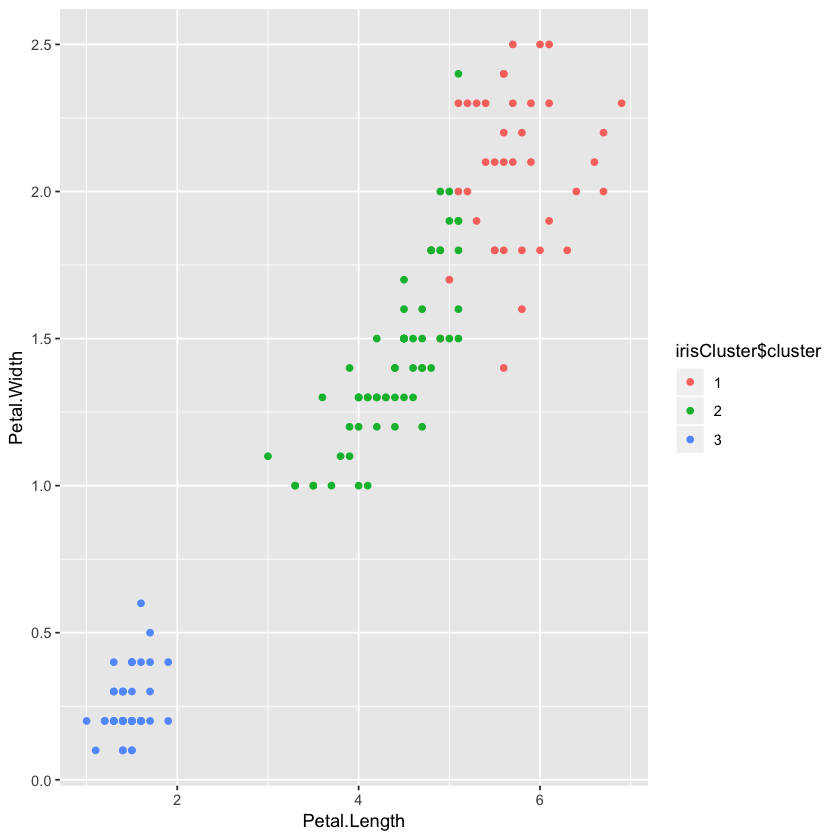

In [133]:
irisCluster$cluster <- as.factor(irisCluster$cluster)
ggplot(iris, aes(Petal.Length, Petal.Width, color = irisCluster$cluster)) + geom_point()

In [58]:
library(cluster)

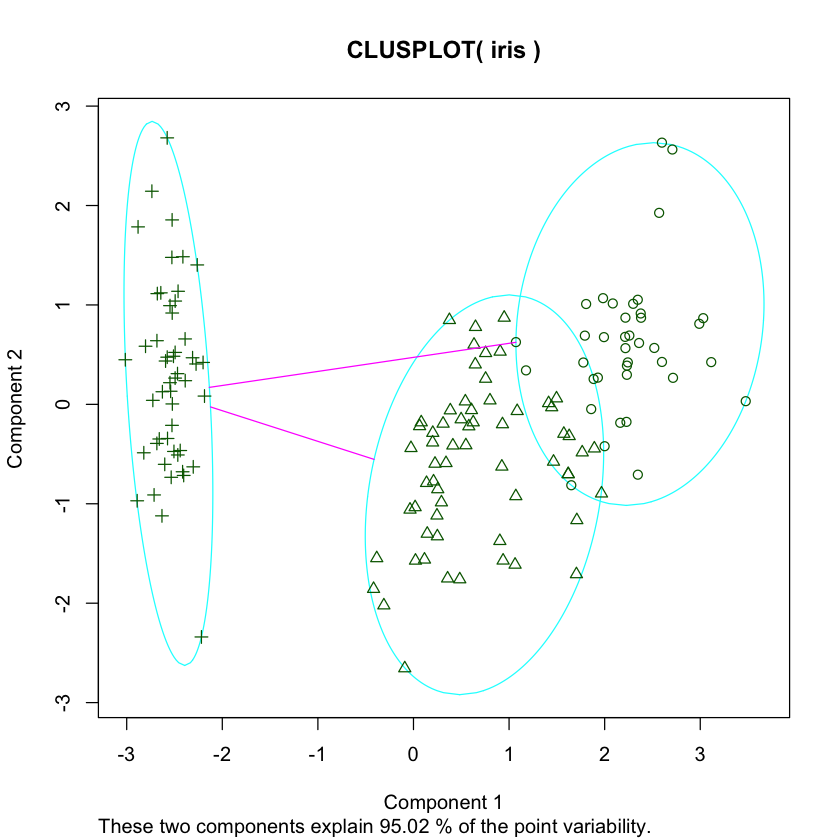

In [63]:
clusplot(iris, irisCluster$cluster)

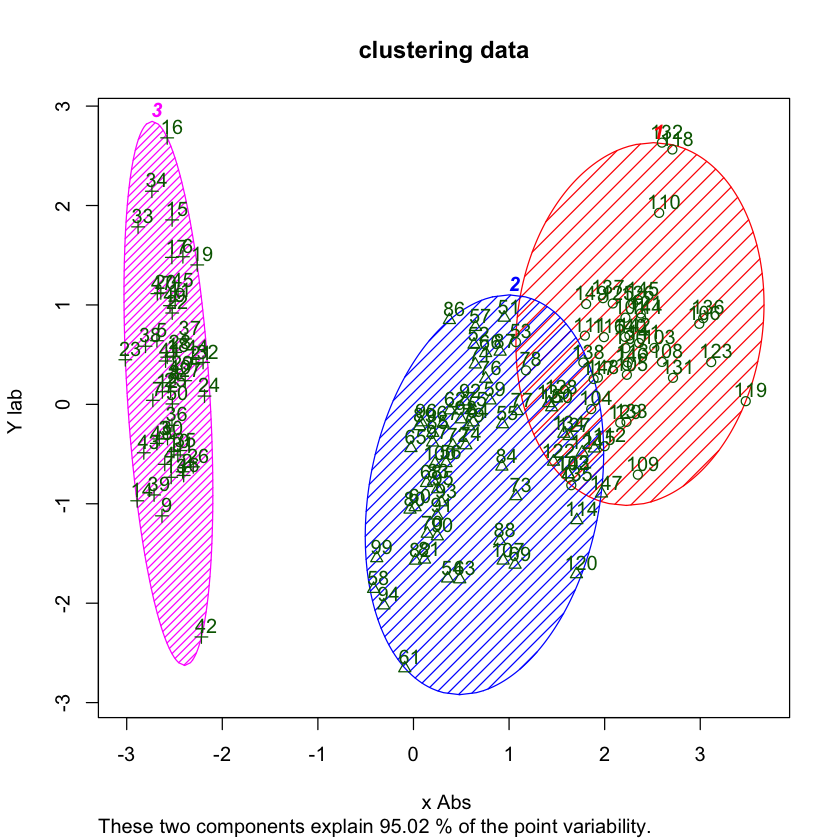

In [64]:
clusplot(iris, irisCluster$cluster, 
    lines=0, 
    shade=T,
    color=T,
    labels=2,
    span=T,
    main=paste("clustering data"),
    xlab=" x Abs",
    ylab="Y lab "
    )

#  K-means. 2
- http://rstudio-pubs-static.s3.amazonaws.com/450733_9a472ce9632f4ffbb2d6175aaaee5be6.html

In [302]:
summary(iris)

  Sepal.Length    Sepal.Width     Petal.Length    Petal.Width   
 Min.   :4.300   Min.   :2.000   Min.   :1.000   Min.   :0.100  
 1st Qu.:5.100   1st Qu.:2.800   1st Qu.:1.600   1st Qu.:0.300  
 Median :5.800   Median :3.000   Median :4.350   Median :1.300  
 Mean   :5.843   Mean   :3.057   Mean   :3.758   Mean   :1.199  
 3rd Qu.:6.400   3rd Qu.:3.300   3rd Qu.:5.100   3rd Qu.:1.800  
 Max.   :7.900   Max.   :4.400   Max.   :6.900   Max.   :2.500  
       Species  
 setosa    :50  
 versicolor:50  
 virginica :50  
                
                
                

In [303]:
names(iris)

[1] "Sepal.Length" "Sepal.Width"  "Petal.Length" "Petal.Width"  "Species"

In [304]:
class(iris)

[1] "data.frame"

In [305]:
dim(iris)

[1] 150   5

In [306]:
head(iris)

Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
5.1,3.5,1.4,0.2,setosa
4.9,3.0,1.4,0.2,setosa
4.7,3.2,1.3,0.2,setosa
4.6,3.1,1.5,0.2,setosa
5.0,3.6,1.4,0.2,setosa
5.4,3.9,1.7,0.4,setosa


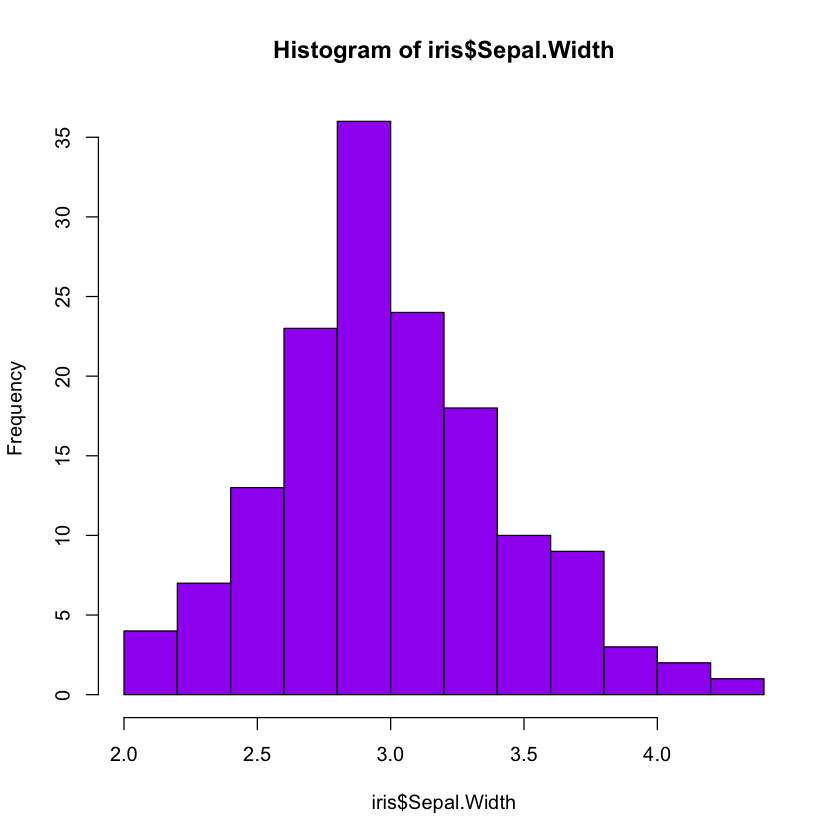

In [310]:
# Plotting Iris
hist(iris$Sepal.Width, col = "purple")

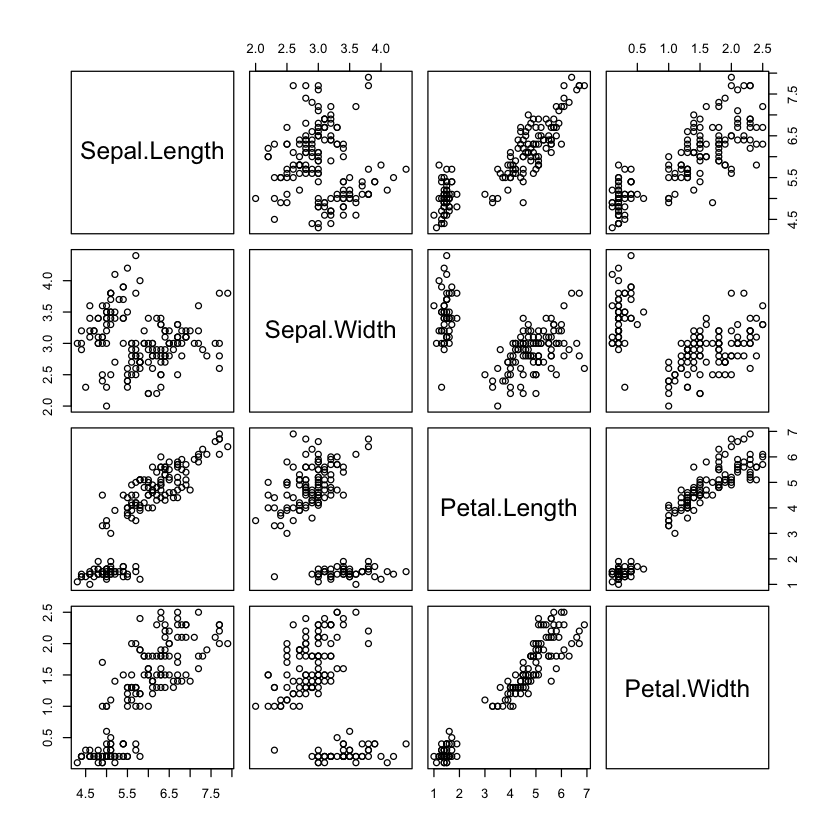

In [312]:
# scatterplot matrix to visualize the data
pairs(iris[, 1:4])

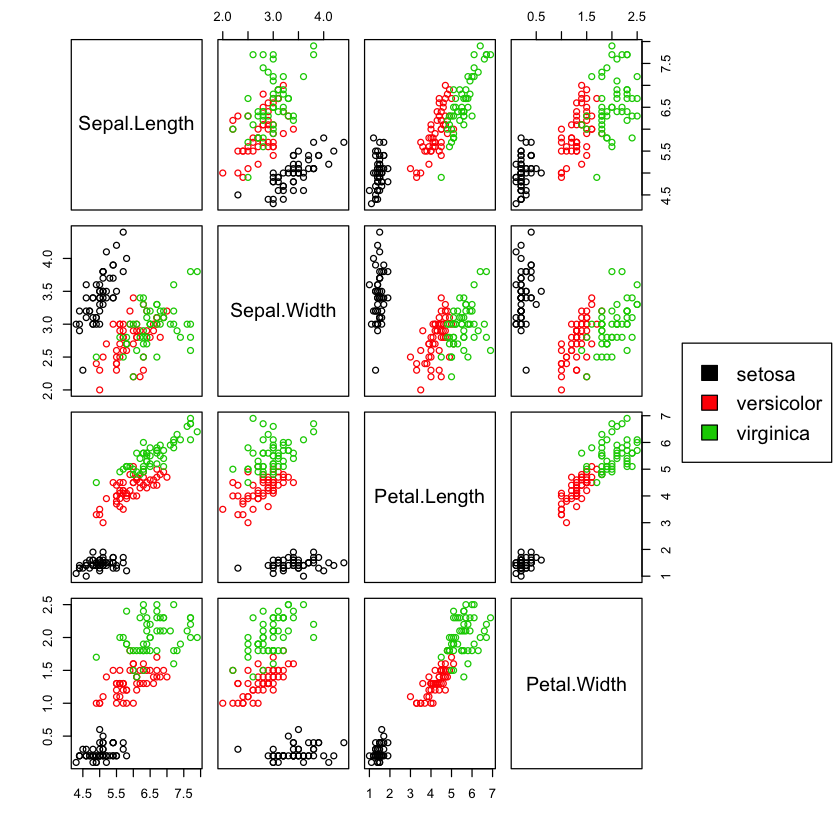

In [331]:
# hard to distinguish what exaxtly we are looking at, so we are going to color it by the class
pairs(iris[,1:4],col=iris[,5],oma=c(4,4,2,12))
par(xpd=TRUE)
legend(0.85,0.6, as.vector(unique(iris$Species)),fill=c(1,2,3))

In [334]:
library(dplyr)
library(ggplot2)
library(corrplot)

corrplot 0.84 loaded


In [337]:
data(iris)
iris2 <- iris

In [338]:
# Now I am wemoving the species by assigning them to NULL.
iris2$Species <- NULL
#now I am making 3 clusters, because I already know for sure there are three species, 
# this would be totally different process if I would not now particular count of clusters
(kmeans.result <- kmeans(iris2, 3))

K-means clustering with 3 clusters of sizes 62, 50, 38

Cluster means:
  Sepal.Length Sepal.Width Petal.Length Petal.Width
1     5.901613    2.748387     4.393548    1.433871
2     5.006000    3.428000     1.462000    0.246000
3     6.850000    3.073684     5.742105    2.071053

Clustering vector:
  [1] 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 [38] 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 [75] 1 1 1 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 3 1 3 3 3 3 1 3 3 3 3
[112] 3 3 1 1 3 3 3 3 1 3 1 3 1 3 3 1 1 3 3 3 3 3 1 3 3 3 3 1 3 3 3 1 3 3 3 1 3
[149] 3 1

Within cluster sum of squares by cluster:
[1] 39.82097 15.15100 23.87947
 (between_SS / total_SS =  88.4 %)

Available components:

[1] "cluster"      "centers"      "totss"        "withinss"     "tot.withinss"
[6] "betweenss"    "size"         "iter"         "ifault"      

In [339]:
table(iris$Species, kmeans.result$cluster)

            
              1  2  3
  setosa      0 50  0
  versicolor 48  0  2
  virginica  14  0 36

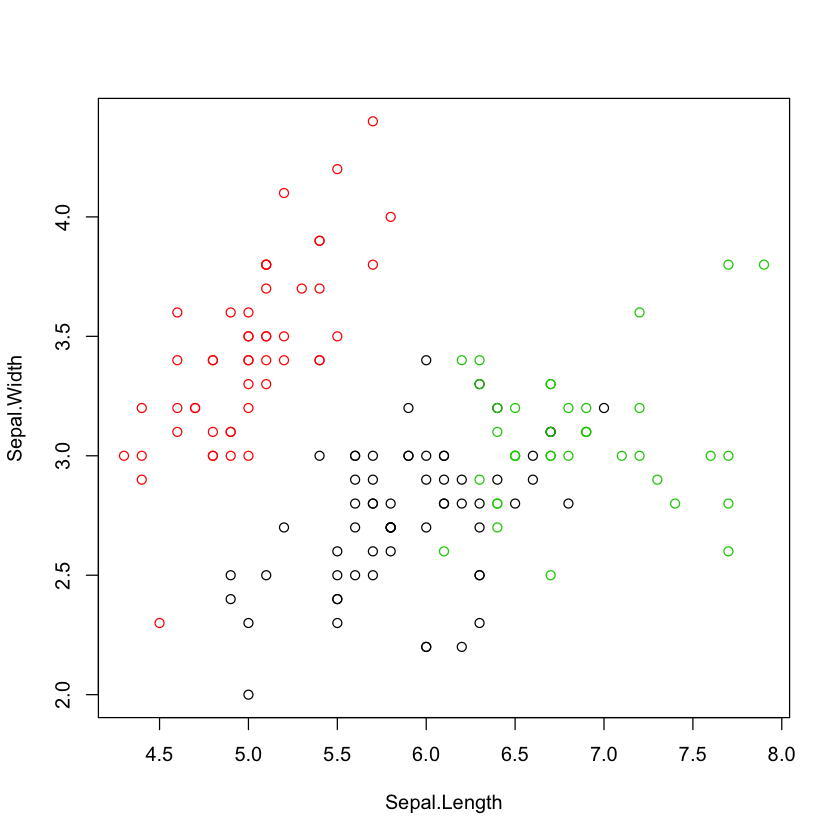

In [344]:
#At last we are plotting the cluster itself
plot(iris2[c("Sepal.Length", "Sepal.Width")], col = kmeans.result$cluster)
#And to distinguish the clusters better, we can plot cluster centers
#For some reason this code is not runing right now, go and figure, but I hope this still will do #as an effort atleast
#points(kmeans.result$centers[c("Sepal.Length", "Sepal.Width")], col = 1:3, pch = 8, cex= 2)

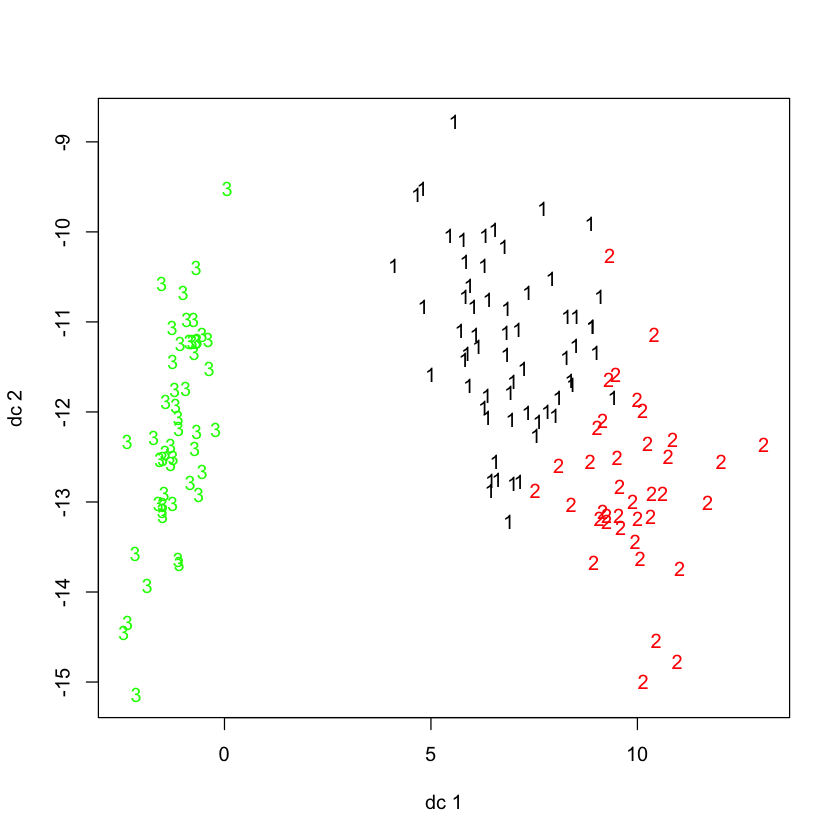

In [349]:

library(cluster) 

 

data(iris) 

 data_for_clustering <- iris[,-5] 

clusters_iris <- kmeans(data_for_clustering, centers = 3) 

plotcluster(data_for_clustering,clusters_iris$cluster) 

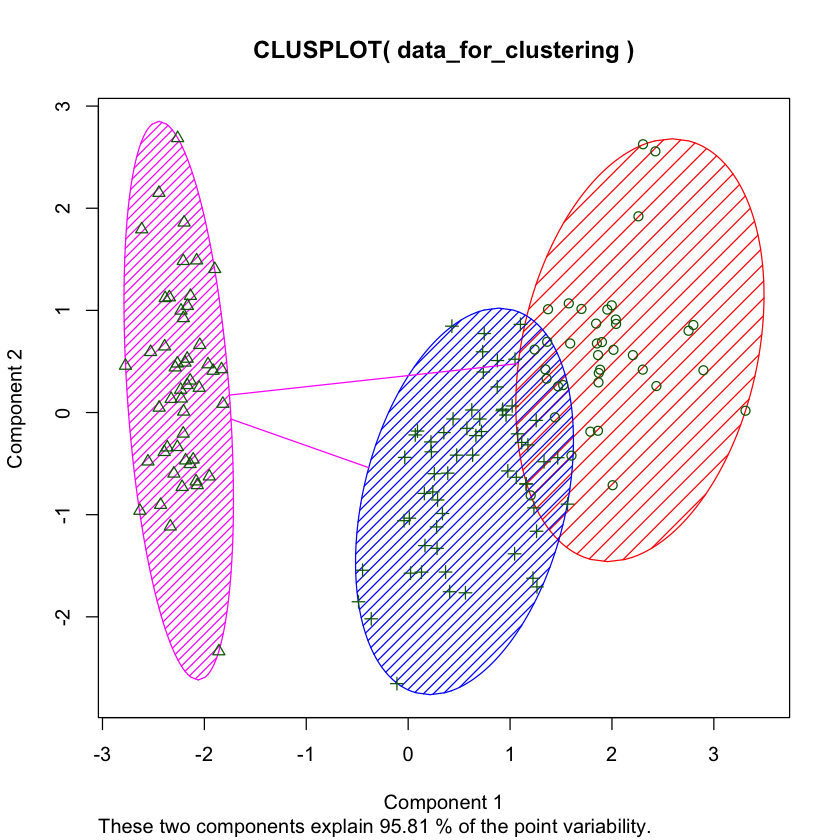

In [347]:
clusplot(data_for_clustering, clusters_iris$cluster, color = TRUE, shade = TRUE)

In [350]:
4.926/2.299

[1] 2.142671

In [134]:
summarise(iris, count=n())

ERROR: Error in summarise(iris, count = n()): could not find function "summarise"


In [135]:
getwd()

[1] "/Users/medamin/Projets/DataScience"

In [204]:
data<- read.csv("~/Downloads/test.csv")


Warning message in file(file, "rt"):
“cannot open file '/Users/medamin/Downloads/test.csv': No such file or directory”

ERROR: Error in file(file, "rt"): cannot open the connection


In [138]:
head(data)

X,Secceed_Count,Failed_Count,Max_Consecutive_Failed_Count,Average_Ping_Time,Difference,Failed_State,Month,Day,Last_Ping_TTL
1,9,0,NA,2,NA,0,6,27,248
2,0,9,9,NA,0,1,6,27,NA
3,9,0,NA,3,NA,0,6,27,248
4,0,9,9,NA,0,1,6,27,NA
5,9,0,NA,2,NA,0,6,27,248
6,9,0,NA,1,NA,0,6,27,57


In [207]:
 
library(dplyr) 

summarize( data$Average_Ping_Time,na.rm()=T,  count=n())

ERROR: Error in parse(text = x, srcfile = src): <text>:3:42: unexpected '='
2: library(dplyr) 
3: summarize( data$Average_Ping_Time,na.rm()=
                                            ^


#  Probability. Concepts

- Odds and log odds 

# Evaluation 

In [196]:
#Write a function to compute the number of non missing and missing observations in 
#a given vector. 
#(Please try your functions for any vector.)
samp.size <- function(x) {
    n_na <- sum(is.na(x)) 
    n_obs <- length(x) - n_na 
    out <- cbind(n_obs, n_na) 
    return(out)
}
nums <- c(1:23,rep(NA,2)) 
samp.size(nums)

n_obs,n_na
23,2


#  Logistic regression

In [ ]:
#library(aod)
library(ggplot2)

In [ ]:
ggplot(cars,aes(x=as.factor(0),y=speed))+geom_boxplot()